In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from mlxtend.plotting import heatmap
import matplotlib.pyplot as plt

file_path = r'C:\Users\Pragna\OneDrive\Desktop\ML_Hourly_data\multiple regression\regression\BTM_hourlyy.csv'
df= pd.read_csv(file_path)
# Assuming df is your DataFrame
df = df.apply(pd.to_numeric, errors='coerce')
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns

if not non_numeric_columns.empty:
    print("Columns with non-numeric values:", non_numeric_columns)
else:
    print("No columns with non-numeric values.")

No columns with non-numeric values.


In [2]:
print('null values in each column')
print(df.isna().sum())
print("total null values")
print(df.isnull().sum().sum())


null values in each column
PM2.5           455
PM10           5712
NO             5453
NO2            5428
NOx            5428
NH3            5447
SO2            5506
CO             5428
Ozone          5439
Benzene        5430
Toluene        5430
Eth-Benzene    5430
MP-Xylene      5430
RH             5429
WS             6655
WD             6655
SR             5565
BP             5451
dtype: int64
total null values
95771


In [3]:

for num in df.columns:
    mean_value = df[num].mean()
    median_value = df[num].median()
    std_dev_value = df[num].std()

    print(f"Column: {num}")
    print(f"Mean: {mean_value}")
    print(f"Median: {median_value}")
    print(f"Standard Deviation: {std_dev_value}")
    print("\n")


import numpy as np

def handle_outliers(data, column_name, threshold_multiplier=3):
    # Calculate mean and standard deviation
    mean_val = np.mean(data[column_name])
    std_dev = np.std(data[column_name])

    # Define the threshold
    threshold = threshold_multiplier * std_dev

    # Identify outliers
    outliers = (data[column_name] < mean_val - threshold) | (data[column_name] > mean_val + threshold)

    # Handle outliers (replace with mean or median)
    data.loc[outliers, column_name] = np.median(data[column_name])  # You can replace with np.mean() if you prefer

    return data

# Example usage for each column
columns_to_handle = ['PM10', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'Benzene', 'Toluene', 'Eth-Benzene', 'MP-Xylene', 'RH', 'WS', 'WD', 'SR', 'BP']

for column in columns_to_handle:
    df = handle_outliers(df, column)

# Now, 'df' contains the data with outliers handled



Column: PM2.5
Mean: 11.86216738197425
Median: -0.02
Standard Deviation: 19.257486539773446


Column: PM10
Mean: 45.18456456456456
Median: 40.68
Standard Deviation: 32.66948142480172


Column: NO
Mean: 10.902776931861439
Median: 9.66
Standard Deviation: 2.682538064458549


Column: NO2
Mean: 21.65468081075961
Median: 24.38
Standard Deviation: 3.7964837403407734


Column: NOx
Mean: 35.85230346656564
Median: 37.43
Standard Deviation: 5.450103391495698


Column: NH3
Mean: 12.782256653992395
Median: 13.79
Standard Deviation: 1.947721654931184


Column: SO2
Mean: 7.457950394154971
Median: 7.96
Standard Deviation: 3.677128586881599


Column: CO
Mean: 0.7390964197764729
Median: 0.74
Standard Deviation: 0.010881826929324677


Column: Ozone
Mean: 21.35363135914958
Median: 21.04
Standard Deviation: 3.5552769667428743


Column: Benzene
Mean: 0.41169035436801216
Median: 0.41
Standard Deviation: 0.006751885130260373


Column: Toluene
Mean: 1.4498881940496493
Median: 1.45
Standard Deviation: 0.0208583

In [4]:
print("Infinite values:", np.any(np.isinf(df)))
print("NaN values:", np.any(np.isnan(df)))
print("Before imputation:\n", df.head())
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
print("After imputation:\n", df_imputed.head())


Infinite values: False
NaN values: True
Before imputation:
    PM2.5   PM10     NO    NO2    NOx    NH3    SO2    CO  Ozone  Benzene  \
0  26.16  51.35  12.02  15.63  36.59  11.20  14.36  0.74  27.03     0.41   
1  28.46  56.15  12.37  15.70  35.90  11.19  13.82  0.74  27.23     0.43   
2  23.87  46.53  11.68  16.48  36.20  11.37  13.56  0.74  27.98     0.41   
3  26.49  52.02  12.07  15.87  37.06  11.33  12.32  0.74  27.30     0.41   
4  24.66  48.19  11.80  16.07  35.90  11.57  12.73  0.74  27.34     0.41   

   Toluene  Eth-Benzene  MP-Xylene     RH  WS  WD     SR      BP  
0     1.43         1.68       0.91  82.03 NaN NaN  24.84  775.05  
1     1.45         1.69       0.87  87.23 NaN NaN  23.62  775.00  
2     1.46         1.65       0.89  89.23 NaN NaN  22.83  775.00  
3     1.44         1.71       0.86  89.25 NaN NaN  23.75  775.00  
4     1.47         1.69       0.89  89.25 NaN NaN  24.12  775.02  
After imputation:
    PM2.5   PM10     NO    NO2    NOx    NH3    SO2    CO  Ozon

In [5]:
print('null values in each column')
print(df_imputed.isna().sum())
print("total null values")
print(df_imputed.isnull().sum().sum())

null values in each column
PM2.5          0
PM10           0
NO             0
NO2            0
NOx            0
NH3            0
SO2            0
CO             0
Ozone          0
Benzene        0
Toluene        0
Eth-Benzene    0
MP-Xylene      0
RH             0
WS             0
WD             0
SR             0
BP             0
dtype: int64
total null values
0


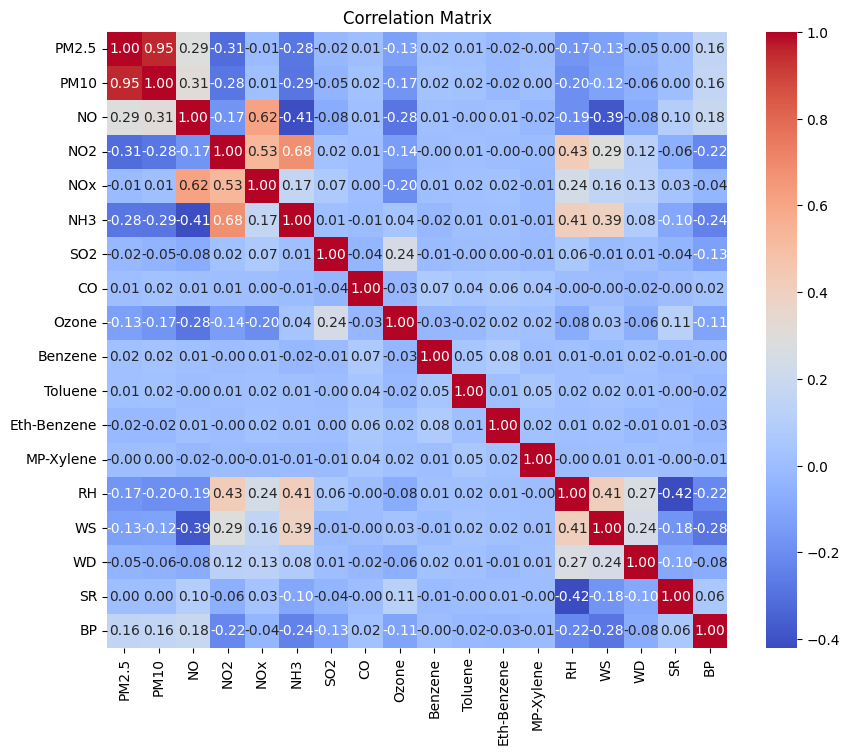

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [7]:
x = df_imputed.drop('PM2.5', axis=1)
y = df_imputed['PM2.5']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)


In [8]:
enet=ElasticNet(alpha=1.0,l1_ratio=0.5)
enet.fit(x_train_std,y_train)
y_pred=enet.predict(x_test_std)
y_pred


array([11.90370485, 11.90370485, 11.90370485, ..., 11.90370485,
       11.90370485, 11.90370485])

In [9]:
print("slope:%.2f"% enet.coef_[0])
print("intercept:%.2f"% enet.intercept_)


slope:6.68
intercept:11.84


In [10]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))
enet.score(x_test_std,y_test)

244.03103079204354
15.621492591684174


0.5259559816328327

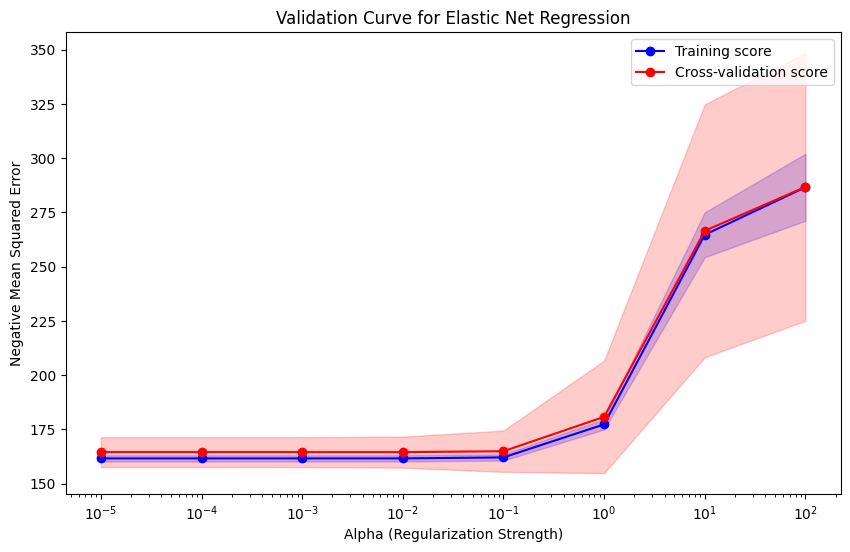

: 

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import validation_curve

# Define a range of alpha values to test
alphas = np.logspace(-5, 2, 8)

# Create Elastic Net model
elastic_net = ElasticNet()

# Generate validation curve
train_scores, test_scores = validation_curve(
    elastic_net, x_train_std, y_train, param_name='alpha', param_range=alphas,
    scoring='neg_mean_squared_error', cv=5
)

# Calculate mean and standard deviation for training and test scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_mean, label='Training score', color='blue', marker='o')
plt.fill_between(alphas, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(alphas, test_mean, label='Cross-validation score', color='red', marker='o')
plt.fill_between(alphas, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)
plt.title('Validation Curve for Elastic Net Regression')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Negative Mean Squared Error')
plt.xscale('log')  # Since alphas are on a log scale
plt.legend(loc='best')
plt.show()


